## Agglomerative clustering


ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [1]:
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

from reco.event import get_bary
from reco.energy import get_total_energy
from reco.plotting import plot_event, plot_remapped, plot_dendrogram
from reco.evaluation import evaluate, evaluate_remapped, run_evaluation

%matplotlib inline

file_name = "~/Data/multi/new_ntuples_14992862_996.root"
tracksters = uproot.open({file_name: "ticlNtuplizer/tracksters"})
simtracksters = uproot.open({file_name: "ticlNtuplizer/simtrackstersSC"})
associations = uproot.open({file_name: "ticlNtuplizer/associations"})

Tracksters reco: 123, tracksters sim: 10
Simulated energy: 3423.19, reconstructed energy: 2886.56 (84.32%)


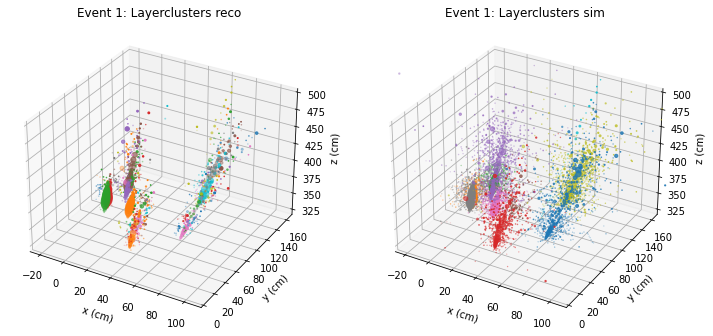

In [2]:
eid = 1

t_indexes = tracksters["vertices_indexes"].array()[eid]
t_energy = tracksters["vertices_energy"].array()[eid]
v_multi = tracksters["vertices_multiplicity"].array()[eid]
st_indexes = simtracksters["stsSC_vertices_indexes"].array()[eid]
st_energy = simtracksters["stsSC_vertices_energy"].array()[eid]
sv_multi = simtracksters["stsSC_vertices_multiplicity"].array()[eid]

print(f"Tracksters reco: {len(t_indexes)}, tracksters sim: {len(st_indexes)}")

reco_total = get_total_energy(t_energy, v_multi)
sim_total = get_total_energy(st_energy, sv_multi)
print(f"Simulated energy: {sim_total:.2f}, reconstructed energy: {reco_total:.2f} ({(reco_total / sim_total) * 100:.2f}%)")

plot_event(tracksters, simtracksters, eid, legend=False)

In [3]:
precision, recall, fscore = evaluate(t_indexes, st_indexes, t_energy, st_energy, v_multi, sv_multi, noise=False)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F-score: {fscore:.2f}")

Precision: 0.97, Recall: 0.16, F-score: 0.28


## Agglomerative clustering

agglomerative hierarchical clustering on barycentres

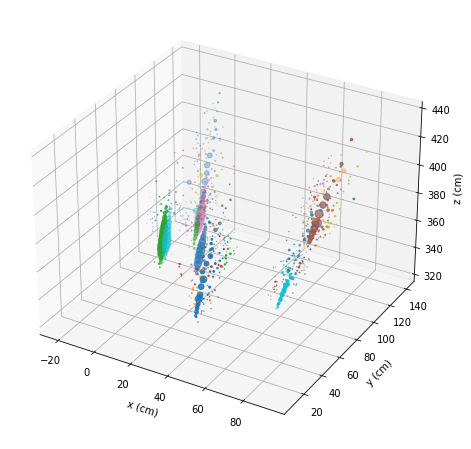

Tracksters: 13


In [41]:
X_bary = get_bary(tracksters, 0)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(X_bary)
plot_remapped(tracksters, eid, model.labels_)
print("Tracksters:", max(model.labels_)+1)

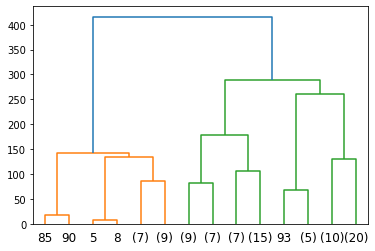

In [42]:
# threshold around 50-100 seems to produce around 10 clusters
plot_dendrogram(model, truncate_mode="level", p=3)

## Evaluation

In [45]:
def agglomerative_bary(tracksters, _eid, distance_threshold=0):
    X_bary = get_bary(tracksters, _eid)
    model = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None).fit(X_bary) 
    return model.labels_

run_evaluation(agglomerative_bary, tracksters, simtracksters, distance_threshold=50)

Event 0: T_reco: 14, T_sim: 10 | p: 0.92 r: 0.64 f:0.75
Event 1: T_reco: 16, T_sim: 10 | p: 0.88 r: 0.61 f:0.72
Event 2: T_reco: 16, T_sim: 10 | p: 0.79 r: 0.64 f:0.70
Event 3: T_reco: 19, T_sim: 10 | p: 0.78 r: 0.50 f:0.61
Event 4: T_reco: 14, T_sim: 10 | p: 0.56 r: 0.54 f:0.55
Event 5: T_reco: 6, T_sim: 10 | p: 0.81 r: 0.88 f:0.84
Event 6: T_reco: 7, T_sim: 10 | p: 0.68 r: 0.84 f:0.75
Event 7: T_reco: 11, T_sim: 10 | p: 0.66 r: 0.84 f:0.74
Event 8: T_reco: 14, T_sim: 10 | p: 0.82 r: 0.45 f:0.58
Event 9: T_reco: 10, T_sim: 10 | p: 0.65 r: 0.76 f:0.70
Event 10: T_reco: 14, T_sim: 10 | p: 0.85 r: 0.56 f:0.67
Event 11: T_reco: 14, T_sim: 10 | p: 0.71 r: 0.59 f:0.64
Event 12: T_reco: 8, T_sim: 10 | p: 0.84 r: 0.77 f:0.80
Event 13: T_reco: 20, T_sim: 10 | p: 0.94 r: 0.43 f:0.59
Event 14: T_reco: 8, T_sim: 10 | p: 0.66 r: 0.89 f:0.76
Event 15: T_reco: 17, T_sim: 10 | p: 0.77 r: 0.54 f:0.64
Event 16: T_reco: 12, T_sim: 10 | p: 0.80 r: 0.54 f:0.65
Event 17: T_reco: 13, T_sim: 10 | p: 0.87 r: 